In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6506/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/review_set.csv')

In [3]:
data

,rating,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,review,sentiment
0,1,B07GQGKZXK,B07GQGKZXK,AH6CWNFNTXEBSBRD5FBER47XFOLQ,2020-01-14 23:21:57.467,0,True,buyer beware item resold amazons warehouse arr...,negative
1,1,B00CXCCB64,B00C1TTF86,AFRXICBKBV7CEZXOPD4US563O3VQ,2013-11-29 21:19:49.000,7,True,worth buy multiplayer constantly crashes beat ...,negative
2,4,B07FJP1FMD,B0B28CMVJV,AHYDK5G25Z2WLLF22SBLD2OCBHPQ,2020-09-27 20:00:58.586,14,True,he fine its going anything amazing quality wis...,positive
3,5,B00ZS80PC2,B07SRWRH5D,AGASOV6NL4XS4WAD663EXCCTINEA,2020-04-27 23:33:51.093,2,True,meant be anyone claiming unhappy remake must h...,positive
4,2,B071HVWD55,B071HVWD55,AH6FPTAFXJHTKK3MCJ3NLHTPBDCQ,2019-10-04 00:40:59.924,0,True,looks feels good it like mouse feels moves bat...,negative
...,...,...,...,...,...,...,...,...,...
209995,2,B00GXMDA74,B00GXMDA74,AGQK7ZYJI7Y2PYDOCC4JFRAXCM5Q,2016-10-02 12:46:04.000,0,True,two star no good,negative
209996,4,B006JKARP8,B006JKARP8,AFUB4MRXTUAADQOJXQFSFSRN5KNA,2012-09-30 03:30:53.000,0,True,great product is vita other chargers work is v...,positive
209997,2,B0748N6796,B0748N6796,AENQMH2SNRORG6XVQULFEG5FF3XQ,2022-02-15 17:26:32.467,0,True,foam ear cups deteriorates falls mic bad corsa...,negative
209998,2,B00002EIZN,B00002EIZN,AGUT7K7IMHDHGOIT6ERVNJZQ575A,2000-12-21 01:23:17.000,3,False,big letdown bought game finished myst riven hu...,negative


In [4]:
data.columns

Index(['rating', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'review', 'sentiment'],
      dtype='object')

<Axes: xlabel='rating'>

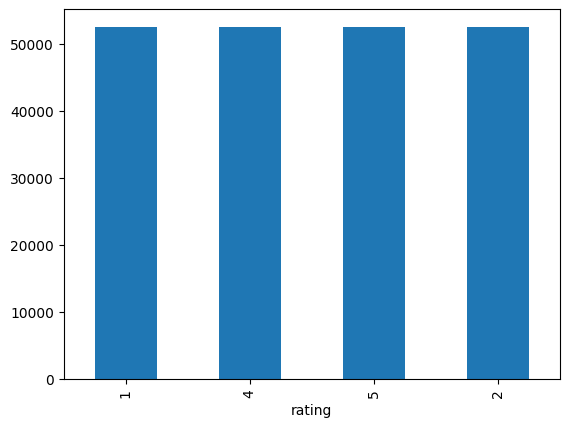

In [5]:
data.rating.value_counts().plot(kind='bar')

In [6]:
from gensim.models import Word2Vec

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [16]:
data['tokenized_text'] = data['review'].astype(str).apply(word_tokenize)


In [17]:
# Train a Word2Vec model
model = Word2Vec(data['tokenized_text'], min_count=1)

# Function to transform text into the average of its word vectors
def text_to_vec(words, model):
    vec = [model.wv[word] for word in words if word in model.wv]
    return sum(vec) / len(vec) if vec else []

# Apply the function to the DataFrame column
data['text_vec'] = data['tokenized_text'].apply(lambda x: text_to_vec(x, model))

In [21]:
len(data.text_vec[0])

100